In [1]:
# import config # to hide TMDB API keys
import requests # to make TMDB API calls
import locale # to format currency as USD 
locale.setlocale( locale.LC_ALL, '' )

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # to format currency on charts axis

api_key = "fb013779ae671c6f3b0da240b779392d"

In [2]:
# Test API by pulling full data sorted by revenue
query = 'https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2017&sort_by=revenue.desc' + "&language=en-US"
response =  requests.get(query)
array = response.json()
array = array['results']

In [3]:
# define column names for our new dataframe
columns = ['film', 'revenue']

# create dataframe with film and revenue columns
df = pd.DataFrame(columns=columns)

In [4]:
# for each of the highest revenue films make an api call for that specific movie to return the budget and revenue
for film in array:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    print(locale.currency(film_revenue['revenue'], grouping=True ))
    df.loc[len(df)]=[film['title'],film_revenue['revenue']] # store title and revenue in our dataframe    

$1,332,698,830.00
$1,263,521,126.00
$1,238,764,765.00
$1,031,552,585.00
$962,102,237.00
$880,166,924.00
$870,322,670.00
$863,756,051.00
$853,977,126.00
$822,854,286.00
$800,526,015.00
$794,861,794.00
$701,842,551.00
$657,926,987.00
$619,021,436.00
$605,425,157.00
$566,652,812.00
$527,000,000.00
$498,814,908.00
$488,533,726.00


In [ ]:
df

,film,revenue
0,Star Wars: The Last Jedi,1332698830
1,Beauty and the Beast,1263521126
2,The Fate of the Furious,1238764765
3,Despicable Me 3,1031552585
4,Jumanji: Welcome to the Jungle,962102237
5,Spider-Man: Homecoming,880166924
6,Wolf Warrior 2,870322670
7,Guardians of the Galaxy Vol. 2,863756051
8,Thor: Ragnarok,853977126
9,Wonder Woman,822854286


KeyError: ignored

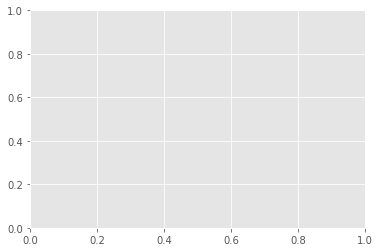

In [ ]:
matplotlib.style.use('ggplot')

fig, ax = plt.subplots()
df.plot(kind="barh", y='revenue', color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'], x=df['film'], ax=ax)

# format xaxis in terms of currency
# formatter = FuncFormatter(currency)
# ax.xaxis.set_major_formatter(formatter)

# ax.legend().set_visible(False)

avg = df['revenue'].mean()

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

ax.set(title='American Films with Highest Revenue (2017)', xlabel='Revenue', ylabel='Film')
